In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import time
import shutil
import pickle
import random
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# from Datapreprocessing import Data
# Data = Data()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import glob
import time
import shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

class Data:
    def __init__(self):
        return

    def file_split(self, file):
        os.mkdir(file) # 創建資料夾
        imagelist = os.listdir('C:/Users/User/Desktop/Deep Learning/Assignment-1 Image classiication/images')
        f = open(file + '.txt') # 打開train.txt檔

        for i in range(22, 50):
            os.mkdir(file + '/' + file + str(i)) # 創建50個類別的資料夾

            for txt in f.readlines(): #逐行讀取test.txt

                for image in glob.glob('images/' + imagelist[i] + '/*.*'): # 讀取images下所有檔案

                    if (txt[17:32] == image[17:32]): # 對比txt及image名稱一不一樣

                        if '.JPEG ' in txt[17:34]: # 1位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:28] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JPEG' in txt[17:34]: # 2位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:29] +'.JPEG', './' + file + '/'+ file + str(i)) # 複製檔案至test目錄
                        elif '.JPE' in txt[17:34]: # 3位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:30] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JP' in txt[17:34]: # 4位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:31] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.J' in txt[17:34]: # 5位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:32] +'.JPEG', './' + file + '/'+ file + str(i))

        f.seek(0)


    def dataset_split(self, file):
        if file == 'train':
            global  train_labels, train_images
            starttime = int(time.time())
            train_images = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))


            for i in range(len(image_list)):
                j = 0
                for images in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121: # 只取前120張
                        break
                    img = cv2.imread(images) # 圖片讀檔
#                     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
#                     img = cv2.resize(img, (254, 254))
                    img = cv2.resize(img, (256, 256))
                    train_images.append(img)

            train_images = np.array(train_images)



            train_labels = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))

            for i in range(len(image_list)):
                j = 0
                for labels in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121:
                        break
                    train_labels.append(i)
            train_labels = np.array(train_labels)

            endtime = int(time.time()) # 計時結束
            print("train_images:",train_images.shape)
            print(type(train_images))
            print("train_labels:",len(train_labels))
            print(type(train_labels))
            print('花了',endtime-starttime,'s')

            return train_images, train_labels

        elif file == 'validation':
            global validation_labels, validation_images
            starttime = int(time.time()) # 計時開始
            validation_images = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))

            for i in range(len(image_list)):
                for images in glob.glob('validation/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
#                   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
#                     img = cv2.resize(img, (254, 254))
                    img = cv2.resize(img, (256, 256))
                    validation_images.append(img)

            validation_images = np.array(validation_images)



            validation_labels = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))


            for i in range(len(image_list)):
                for labels in glob.glob('validation/' + image_list[i] + '/*'):
                    validation_labels.append(i)

            validation_labels = np.array(validation_labels)

            endtime = int(time.time()) # 計時結束
            print("validation_images:",validation_images.shape)
            print(type(validation_images))
            print("validation_labels:",len(validation_labels))
            print(type(validation_labels))
            print('花了',endtime-starttime,'s')

            return validation_images, validation_labels

        elif file == 'test':
            global test_labels, test_images
            starttime = int(time.time())
            # images
            test_images = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))

            for i in range(len(image_list)):
                for images in glob.glob('test/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
#                     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (254, 254))
#                     img = cv2.resize(img, (256, 256))
                    test_images.append(img)

            test_images = np.array(test_images)

            # labels
            test_labels = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))


            for i in range(len(image_list)):
                for labels in glob.glob('test/' + image_list[i] + '/*'):
                    test_labels.append(i)

            test_labels = np.array(test_labels)
            endtime = int(time.time())

            print("test_images:",test_images.shape)
            print(type(test_images))
            print("test_labels:",len(test_labels))
            print(type(test_labels))
            print('花了',endtime-starttime,'s')

            return test_images, test_labels


In [5]:
Data().dataset_split(file = 'train')
Data().dataset_split('validation')
Data().dataset_split('test')
starttime = int(time.time())
train_images = train_images - np.mean(test_images)
train_images = train_images/np.std(train_images)
endtime = int(time.time())
print('train_images花了',endtime-starttime,'s')
starttime = int(time.time())
test_images = test_images - np.mean(test_images)
test_images = test_images/np.std(test_images)
endtime = int(time.time())
print('test_images花了',endtime-starttime,'s')

train_images: (6000, 256, 256, 3)
<class 'numpy.ndarray'>
train_labels: 6000
<class 'numpy.ndarray'>
花了 6 s
validation_images: (450, 256, 256, 3)
<class 'numpy.ndarray'>
validation_labels: 450
<class 'numpy.ndarray'>
花了 1 s
test_images: (450, 254, 254, 3)
<class 'numpy.ndarray'>
test_labels: 450
<class 'numpy.ndarray'>
花了 0 s
train_images花了 8 s
test_images花了 1 s


0.0% iter: 0, loss: 457.3894768667954
20.0% iter: 100, loss: 4.2584025681509905
40.0% iter: 200, loss: 5.291793202970077
60.0% iter: 300, loss: 2.35811103100862
80.0% iter: 400, loss: 3.292339627095386


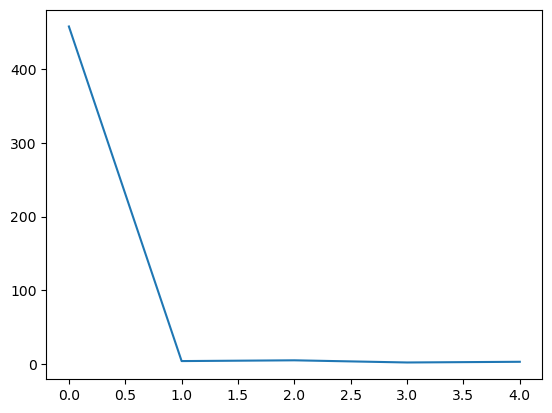

TRAIN--> Correct: 799 out of 39888, acc=0.020031087043722424
TEST--> Correct: 9 out of 450, acc=0.02


In [14]:
# TwoLayerNet
from Assignment2 import TwoLayerNet
import Assignment2 as A2
batch_size = 4
model1 = TwoLayerNet(batch_size, 256*256*3, 1200, 50)
D_out = 50

losses = []
optim = A2.SGDMomentum(model1.get_params(), lr=0.0001, momentum=0.80, reg=0.00003)
criterion = A2.CrossEntropyLoss()

# TRAIN
ITER = 500
for i in range(ITER):
	# get batch, make onehot
	X_batch, Y_batch = A2.get_batch(train_images, train_labels, batch_size)
	Y_batch = A2.MakeOneHot(Y_batch, D_out)

	# forward, loss, backward, step
	Y_pred = model1.forward(X_batch)
	loss, backout = criterion.get(Y_pred, Y_batch)
	model1.backward(backout)
	optim.step()

	if i % 100 == 0:
		print("%s%% iter: %s, loss: %s" % (100*i/ITER,i, loss))
		losses.append(loss)


# save params
weights = model1.get_params()
with open("weights.pkl","wb") as f:
	pickle.dump(weights, f)

A2.draw_losses(losses)



# TRAIN SET ACC
Y_pred = model1.forward(train_images)
result = np.argmax(Y_pred, axis=1) - train_labels
result = list(result)
print("TRAIN--> Correct: " + str(result.count(0)) + " out of " + str(train_images.shape[0]) + ", accury=" + str(result.count(0)/train_images.shape[0]))

# TEST SET ACC
Y_pred = model1.forward(test_images)
result = np.argmax(Y_pred, axis=1) - test_labels
result = list(result)
print("TEST--> Correct: " + str(result.count(0)) + " out of " + str(test_images.shape[0]) + ", accury=" + str(result.count(0)/test_images.shape[0]))

0.0% iter: 0, loss: 5.424502187370187
2.0% iter: 100, loss: 3.876934184739255
4.0% iter: 200, loss: 7.8515657682106115
6.0% iter: 300, loss: 18.45817601462692
8.0% iter: 400, loss: 6.096752422366922
10.0% iter: 500, loss: 6.674765940005102
12.0% iter: 600, loss: 27.998680305462422
14.0% iter: 700, loss: 4.891143536387684
16.0% iter: 800, loss: 3.474583711822625
18.0% iter: 900, loss: 3.8011187579639736
20.0% iter: 1000, loss: 14.42150010015711
22.0% iter: 1100, loss: 4.0667723604479455
24.0% iter: 1200, loss: 14.02941698768378
26.0% iter: 1300, loss: 4.236614382521923
28.0% iter: 1400, loss: 14.338558357439217
30.0% iter: 1500, loss: 3.0823227637911144
32.0% iter: 1600, loss: 5.798856782708926
34.0% iter: 1700, loss: 33.59807057005803
36.0% iter: 1800, loss: 6.508539917279241
38.0% iter: 1900, loss: 35.08032676004874
40.0% iter: 2000, loss: 13.365124778901777
42.0% iter: 2100, loss: 54.64017292239964
44.0% iter: 2200, loss: 8.054779920654989
46.0% iter: 2300, loss: 73.91010954242215
48

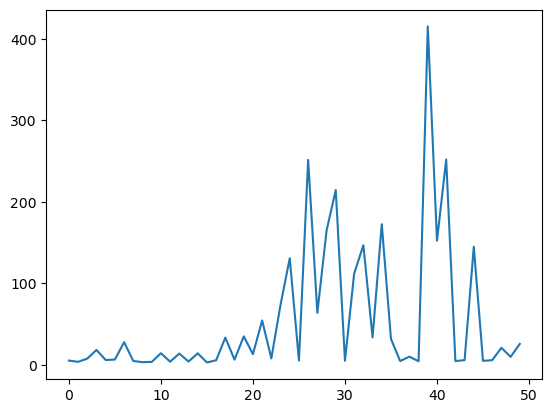

TRAIN--> Correct: 1344 out of 39888, accury=0.03369434416365824
TEST--> Correct: 14 out of 450, accury=0.03111111111111111


In [7]:
# TwoLayerNet
from Assignment2 import TwoLayerNet
import Assignment2 as A2
batch_size = 4
model1 = TwoLayerNet(batch_size, 256*256*3, 4096, 50)
D_out = 50

losses = []
optim = A2.SGDMomentum(model1.get_params(), lr=0.001, momentum=0.80, reg=0.00003)
criterion = A2.CrossEntropyLoss()

# TRAIN
epochs = 500
for i in range(epochs):
	# get batch, make onehot
	X_batch, Y_batch = A2.get_batch(train_images, train_labels, batch_size)
	Y_batch = A2.MakeOneHot(Y_batch, D_out)

	# forward, loss, backward, step
	Y_pred = model1.forward(X_batch)
	loss, backout = criterion.get(Y_pred, Y_batch)
	model1.backward(backout)
	optim.step()

	if i % 100 == 0:
		print("%s%% epochs: %s, loss: %s" % (100*i/epochs,i, loss))
		losses.append(loss)


# save params
weights = model1.get_params()
with open("weights.pkl","wb") as f:
	pickle.dump(weights, f)

A2.draw_losses(losses)



# TRAIN SET ACC
Y_pred = model1.forward(train_images)
result = np.argmax(Y_pred, axis=1) - train_labels
result = list(result)
print("TRAIN--> Correct: " + str(result.count(0)) + " out of " + str(train_images.shape[0]) + ", accury=" + str(result.count(0)/train_images.shape[0]))

# TEST SET ACC
Y_pred = model1.forward(test_images)
result = np.argmax(Y_pred, axis=1) - test_labels
result = list(result)
print("TEST--> Correct: " + str(result.count(0)) + " out of " + str(test_images.shape[0]) + ", accury=" + str(result.count(0)/test_images.shape[0]))

0.0% iter: 0, loss: 3.9458113327110627
10.0% iter: 1, loss: 3.9458113327110627
20.0% iter: 2, loss: 3.9458113327110627
30.0% iter: 3, loss: 3.9458113327110627
40.0% iter: 4, loss: 3.9458113327110627
50.0% iter: 5, loss: 3.9458113327110627
60.0% iter: 6, loss: 3.9458113327110627
70.0% iter: 7, loss: 3.9458113327110627
80.0% iter: 8, loss: 3.9458113327110627
90.0% iter: 9, loss: 3.9458113327110627


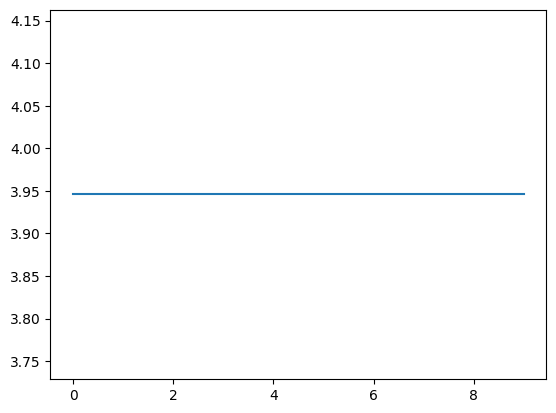

TRAIN--> Correct: 120 out of 6000, acc=0.02
TEST--> Correct: 9 out of 450, acc=0.02


In [6]:
# LeNet5

from Assignment2 import LeNet5
import Assignment2 as A2
batch_size = 4
model = LeNet5()
D_out = 50

losses = []
optim = A2.SGDMomentum(model.get_params(), lr=0.0001, momentum=0.80, reg=0.00003)
criterion = A2.CrossEntropyLoss()

# TRAIN
epochs = 10
for i in range(epochs):
	# get batch, make onehot
	X_batch, Y_batch = A2.get_batch(train_images, train_labels, batch_size)
	Y_batch = A2.MakeOneHot(Y_batch, D_out)

	# forward, loss, backward, step
	Y_pred = model.forward(X_batch)
	loss, backout = criterion.get(Y_pred, Y_batch)
	model.backward(backout)
	optim.step()

	if i % 1 == 0:
		print("%s%% epochs: %s, loss: %s" % (100*i/epochs,i, loss))
		losses.append(loss)


# save params
weights = model.get_params()
with open("weights.pkl","wb") as f:
	pickle.dump(weights, f)

A2.draw_losses(losses)



# TRAIN SET ACC
Y_pred = model.forward(train_images)
result = np.argmax(Y_pred, axis=1) - train_labels
result = list(result)
print("TRAIN--> Correct: " + str(result.count(0)) + " out of " + str(train_images.shape[0]) + ", acc=" + str(result.count(0)/train_images.shape[0]))

# TEST SET ACC
Y_pred = model.forward(test_images)
result = np.argmax(Y_pred, axis=1) - test_labels
result = list(result)
print("TEST--> Correct: " + str(result.count(0)) + " out of " + str(test_images.shape[0]) + ", acc=" + str(result.count(0)/test_images.shape[0]))

C:\Users\User\Desktop\Deep-Learning\Assignment_2_LeNetComputational_Graph\Assignment2.py:61: RuntimeWarning: overflow encountered in exp
  out = 1 / (1 + np.exp(-X))
C:\Users\User\Desktop\Deep-Learning\Assignment_2_LeNetComputational_Graph\Assignment2.py:69: RuntimeWarning: overflow encountered in exp
  dX = backout * 1 / (1 + np.exp(-X))  + X * 1 / (1 + np.exp(-X)) * (1 - 1 / (1 + np.exp(-X)))  # Sigmoid backward


0.0% epochs: 0, loss: 3.9458113327110627
10.0% epochs: 1, loss: 3.9458113327110627
20.0% epochs: 2, loss: 3.9458113327110627
30.0% epochs: 3, loss: 3.9458113327110627
40.0% epochs: 4, loss: 3.9458113327110627
50.0% epochs: 5, loss: 3.9458113327110627
60.0% epochs: 6, loss: 3.9458113327110627
70.0% epochs: 7, loss: 3.9458113327110627
80.0% epochs: 8, loss: 3.9458113327110627
90.0% epochs: 9, loss: 3.9458113327110627


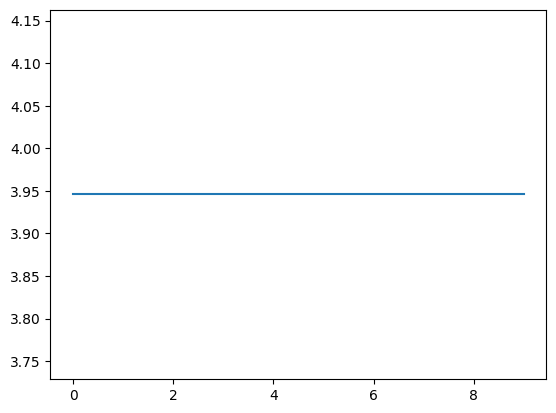

TRAIN--> Correct: 131 out of 6000, acc=0.021833333333333333
TEST--> Correct: 11 out of 450, acc=0.024444444444444446


In [4]:
# LeNet5 Improved

from Assignment2 import LeNet5_Im
import Assignment2 as A2
batch_size = 4
model = LeNet5_Im()
D_out = 50

losses = []
optim = A2.SGDMomentum(model.get_params(), lr=0.001, momentum=0.80, reg=0.00003)
criterion = A2.CrossEntropyLoss()

# TRAIN
# epochs = list(range())
epochs = 10
for i in range(epochs):
	# get batch, make onehot
	X_batch, Y_batch = A2.get_batch(train_images, train_labels, batch_size)
	Y_batch = A2.MakeOneHot(Y_batch, D_out)

	# forward, loss, backward, step
	Y_pred = model.forward(X_batch)
	loss, backout = criterion.get(Y_pred, Y_batch)
	model.backward(backout)
	optim.step()

	if i % 1 == 0:
		print("%s%% epochs: %s, loss: %s" % (100*i/epochs,i, loss))
		losses.append(loss)


# save params
weights = model.get_params()
with open("weights.pkl","wb") as f:
	pickle.dump(weights, f)

A2.draw_losses(losses)



# TRAIN SET ACC
Y_pred = model.forward(train_images)
result = np.argmax(Y_pred, axis=1) - train_labels
result = list(result)
print("TRAIN--> Correct: " + str(result.count(0)) + " out of " + str(train_images.shape[0]) + ", acc=" + str(result.count(0)/train_images.shape[0]))

# TEST SET ACC
Y_pred = model.forward(test_images)
result = np.argmax(Y_pred, axis=1) - test_labels
result = list(result)
print("TEST--> Correct: " + str(result.count(0)) + " out of " + str(test_images.shape[0]) + ", acc=" + str(result.count(0)/test_images.shape[0]))